# <center>Analyzing & Predicting Massachusetts Crash Data </center>

## 1. Introduction

###  1.1 Background

Every crash reported to a police department in the United States of America gets its details recorded by the police and added to the respective cities' database.
These records have attributes that help provide data and statics regarding the kind and severity of accidents on the roads.  This information can be used to monitor the statistics of crashes over time and can be key in determinng where to implement  transportation changes.

### 1.2 Problem & Interest

The State of Massachusetts wants to rank as number 1 in the 'The Safest US State to Drive' List by 2027. 
The Massachusetts Department of Transportation has therefore been tasked with the mission of coming up with ways to reduce the number of crashes and fatalities. 
Some of the options they are considering are: improving road conditions, reconfiguring roads, facilitating other transportation options and/or changes to traffic laws.
In order to complete mission data needs to be analyzed regarding the crashes that happened in 2019 so that major areas of concern can be analyzed and specific gameplan can be set in place.
Budget allocation for this mission will depend on the scope of how much work is recommended by the analysis

## Data Acquisition

### 2.1 Data Sources

Data from the following link: <a href="https://massdot-impact-crashes-vhb.opendata.arcgis.com/datasets/2019-crashes-/data"> MassDOT Crash Open Data Portal</a> is what will be used to analyze which roads will need the priority attention in order to achieve this goal.

The 2019 Crashes data will be used to provide the analysis needed by looking at crash severity and road conditions of where crashes tend to occur the most.

This data set includes accident severity attributes in terms of fatalities, property damage and number of vehicles involved. This data can be used to predict crashes in other roads not included in the dataset and thus be leveraged to prevent crashes on such roads by making needed changes.

### 2.2 Data Cleaning

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 8.9MB/s ta 0:00:011
Libraries imported.


In [2]:
#loading data downloaded from MassDOT Crash Open Data Portal via Watson Studio Data Sets option
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_7090f3b6e11b417eb236ff2a39fb8dd7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JyBLr6YeRQbqdAk-WF6FkyyaN6MawcILaQi2g_PsELKu',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_7090f3b6e11b417eb236ff2a39fb8dd7.get_object(Bucket='couseracapstoneweek2-donotdelete-pr-pduld7znrtgfwa',Key='2019Crashes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (96,108) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CRASH_DATETIME,OBJECTID,CRASH_NUMB,CITY_TOWN_NAME,CRASH_DATE_TEXT,CRASH_TIME_2,CRASH_HOUR,CRASH_STATUS,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,POLC_AGNCY_TYPE_DESCR,MANR_COLL_DESCR,VEHC_MNVR_ACTN_CL,VEHC_TRVL_DIRC_CL,VEHC_SEQ_EVENTS_CL,AMBNT_LIGHT_DESCR,WEATH_COND_DESCR,ROAD_SURF_COND_DESCR,FIRST_HRMF_EVENT_DESCR,MOST_HRMFL_EVT_CL,DRVR_CNTRB_CIRC_CL,VEHC_CONFIG_CL,STREET_NUMB,RDWY,DIST_DIRC_FROM_INT,NEAR_INT_RDWY,MM_RTE,DIST_DIRC_MILEMARKER,MILEMARKER,EXIT_RTE,DIST_DIRC_EXIT,EXIT_NUMB,DIST_DIRC_LANDMARK,LANDMARK,RDWY_JNCT_TYPE_DESCR,TRAF_CNTRL_DEVC_TYPE_DESCR,TRAFY_DESCR_DESCR,JURISDICTN,FIRST_HRMF_EVENT_LOC_DESCR,NON_MTRST_TYPE_CL,NON_MTRST_ACTN_CL,NON_MTRST_LOC_CL,IS_GEOCODED,GEOCODING_METHOD_NAME,X,Y,LAT,LON,RMV_DOC_IDS,CRASH_RPT_IDS,YEAR,AGE_DRVR_YNGST,AGE_DRVR_OLDEST,AGE_NONMTRST_YNGST,AGE_NONMTRST_OLDEST,DRVR_DISTRACTED_CL,DISTRICT_NUM,RPA_ABBR,VEHC_EMER_USE_CL,VEHC_TOWED_FROM_SCENE_CL,CNTY_NAME,FMCSA_RPTBL_CL,FMCSA_RPTBL,HIT_RUN_DESCR,LCLTY_NAME,ROAD_CNTRB_DESCR,SCHL_BUS_RELD_DESCR,SPEED_LIMIT,TRAF_CNTRL_DEVC_FUNC_DESCR,WORK_ZONE_RELD_DESCR,AADT,AADT_YEAR,PK_PCT_SUT,AV_PCT_SUT,PK_PCT_CT,AV_PCT_CT,CURB,TRUCK_RTE,LT_SIDEWLK,RT_SIDEWLK,SHLDR_LT_W,SHLDR_LT_T,SURFACE_WD,SURFACE_TP,SHLDR_RT_W,SHLDR_RT_T,NUM_LANES,OPP_LANES,MED_WIDTH,MED_TYPE,URBAN_TYPE,F_CLASS,URBAN_AREA,FD_AID_RTE,FACILITY,OPERATION,CONTROL,PEAK_LANE,SPEED_LIM,STREETNAME,FROMSTREETNAME,TOSTREETNAME,CITY,STRUCT_CND,TERRAIN,URBAN_LOC_TYPE,AADT_DERIV,STATN_NUM,OP_DIR_SL,SHLDR_UL_T,SHLDR_UL_W,F_F_CLASS,SHAPE
0,2019/01/01 01:00:00+00,2504847,4643564,ATTLEBORO,1/1/2019,1:00:00,1:00:00,Open,Property damage only (none injured),No injury,1,0,0,Local police,Single vehicle crash,V1: Travelling straight ahead,V1: E,"V1:(Collision with embankment),(Collision wit...",Dark - lighted roadway,Rain,Wet,Collision with embankment,V1:(Collision with embankment),NaN,V1:(Passenger car),787,WEST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CUL DE SAC NEAR RTE 95 SB,Not at junction,No controls,"Two-way, not divided",City or Town accepted road,Outside roadway,NaN,NaN,NaN,Yes,At Address,215161.5115,854356.1291,41.939413,-71.317171,PW201903201323 / PW201900200118,1900000040 / 1900000040,2019,21-24,21-24,NaN,NaN,NaN,5,SRPEDD,V1:(No),"V1:(Yes, vehicle or trailer disabled)",BRISTOL,NaN,NaN,"Yes, hit and run",NaN,None,"No, school bus not involved",NaN,"No, device not functioning",Yes,1184.0,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,0.0,0.0,No Shoulder,28.0,Surface-treated road,2.0,Stable - Unruttable compacted subgrade,2.0,0.0,0.0,None,Large Urbanized Area,Local,Providence (RI-MA),NaN,Mainline roadway,Two-way traffic,No Access Control,NaN,NaN,WEST STREET,NEWPORT AVENUE,CUL_DE_SAC,ATTLEBORO,Fair,Level Terrain,NaN,NaN,NaN,NaN,0,0.0,Local,NaN
1,2019/01/01 00:56:00+00,2504850,4643567,SALEM,1/1/2019,12:56:00,12:00:00,Open,Non-fatal injury,Non-fatal injury - Possible,2,1,0,Local police,Angle,V1: Turning left / V2: Turning right,V1: E / V2: E,"V1:(Collision with motor vehicle in traffic),...",Dark - lighted roadway,Rain/Rain,Wet,Collision with motor vehicle in traffic,V1:(Collision with motor vehicle in traffic) /...,"D1: (No improper driving),(No improper driving)","V1:(Passenger car) / V2:(Light truck(van, mini...",NaN,CONGRESS/DERBY / CONGRESS ST / DERBY ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Four-way intersection,Traffic control signal,"Two-way, divided, positive median barrier",City or Town accepted road,Roadway,NaN,NaN,NaN,Yes,At Intersection,250114.1248,919085.0624,42.520699,-70.890113,PW201903201863 / PW201900200121,1900000007 / 1900000007,2019,18-20,25-34,NaN,NaN,D1: Manually operating an electronic device /...,4,MAPC,V1:(No) / V2:(No),NaN,ESSEX,NaN,NaN,No hit and run,NaN,"Road surface condition (wet, icy, snow, slush,...","No, school bus not involved",NaN,"Yes, device functioning",No,25134.0,2013.0,0.241,554.0,0.082,256.0,Both sides,Not a parkway - not on a designated truck route,8.0,8.0,0.0,No Shoulder,34.0,Bituminous concrete road,0.0,No Shoulder,2.0,

In [3]:
df.shape

(139109, 116)

In [4]:
#column_names = ['CRASH_DATE_TEXT','CRASH_SEVERITY_DESCR']
#state = pd.DataFrame(columns = column_names)
#state

In [5]:
#select a subset of needed columns from dataset that will be used in most of the analysis/prediction
df1 = df[['OBJECTID', 'CITY_TOWN_NAME','CNTY_NAME','CRASH_DATE_TEXT','CRASH_SEVERITY_DESCR','MAX_INJR_SVRTY_CL','CRASH_HOUR', 'NUMB_VEHC',
          'NUMB_NONFATAL_INJR','NUMB_FATAL_INJR','AMBNT_LIGHT_DESCR','ROAD_SURF_COND_DESCR','RDWY_JNCT_TYPE_DESCR', 'LAT', 'LON', 'SPEED_LIMIT']]

In [6]:
df1.head(7)

,OBJECTID,CITY_TOWN_NAME,CNTY_NAME,CRASH_DATE_TEXT,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,CRASH_HOUR,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,AMBNT_LIGHT_DESCR,ROAD_SURF_COND_DESCR,RDWY_JNCT_TYPE_DESCR,LAT,LON,SPEED_LIMIT
0,2504847,ATTLEBORO,BRISTOL,1/1/2019,Property damage only (none injured),No injury,1:00:00,1,0,0,Dark - lighted roadway,Wet,Not at junction,41.939413,-71.317171,NaN
1,2504850,SALEM,ESSEX,1/1/2019,Non-fatal injury,Non-fatal injury - Possible,12:00:00,2,1,0,Dark - lighted roadway,Wet,Four-way intersection,42.520699,-70.890113,NaN
2,2504851,SALEM,ESSEX,1/1/2019,Non-fatal injury,Non-fatal injury - Incapacitating,10:00:00,1,1,0,Dark - lighted roadway,Dry,T-intersection,42.524834,-70.889659,30.0
3,2505020,EVERETT,MIDDLESEX,1/1/2019,Property damage only (none injured),No injury,4:00:00,1,0,0,Dusk,Dry,T-intersection,42.398912,-71.048625,25.0
4,2505022,HAVERHILL,ESSEX,1/1/2019,Property damage only (none injured),No injury,3:00:00,1,0,0,Dark - lighted roadway,Wet,Four-way intersection,42.766455,-71.043487,35.0
5,2505135,SPRINGFIELD,HAMPDEN,1/1/2019,Property damage only (none injured),No injury,4:00:00,2,0,0,Dark - lighted roadway,Wet,Not at junction,42.121216,-72.584202,5.0
6,2505136,SPRINGFIELD,HAMPDEN,1/1/2019,Property damage only (none injured),No injury,5:00:00,2,0,0,Dark - lighted roadway,Wet,Not at junction,42.088946,-72.532527,30.0


In [7]:
#select a subset of needed columns and confirm number of rows for dataset that will be used in most of the analysis/prediction
df1.shape

(139109, 16)

#### Adding another dataset for population to use to compare with volume of crashes
The data is from https://www.indexmundi.com/facts/united-states/quick-facts/massachusetts/population#table

In [8]:
#list all the distict counties
print(sorted(df1.CNTY_NAME.unique()))

['BARNSTABLE', 'BERKSHIRE', 'BRISTOL', 'DUKES', 'ESSEX', 'FRANKLIN', 'HAMPDEN', 'HAMPSHIRE', 'MIDDLESEX', 'NANTUCKET', 'NORFOLK', 'PLYMOUTH', 'SUFFOLK', 'WORCESTER']


In [9]:
# initialise data of lists. 
data = {'CNTY_NAME':['BARNSTABLE', 'BERKSHIRE', 'BRISTOL', 'DUKES', 'ESSEX', 'FRANKLIN', 'HAMPDEN', 'HAMPSHIRE', 'MIDDLESEX', 'NANTUCKET', 'NORFOLK', 'PLYMOUTH', 'SUFFOLK', 'WORCESTER'], 
        'POPULATION':[213413,	126348,	564022,	17352,	790638,	70963,	470406,	161355,	1614714, 11327, 705388,	518132,	807252,	830839]} 
  
# Creates pandas DataFrame. 
df_pop = pd.DataFrame(data) 
  
# print the data, sorted and indexed
df_pops = df_pop.sort_values(by =['POPULATION'], ascending = False)
df_popsr = df_pops.reset_index(drop=True, inplace=True)
df_pops

,CNTY_NAME,POPULATION
0,MIDDLESEX,1614714
1,WORCESTER,830839
2,SUFFOLK,807252
3,ESSEX,790638
4,NORFOLK,705388
5,BRISTOL,564022
6,PLYMOUTH,518132
7,HAMPDEN,470406
8,BARNSTABLE,213413
9,HAMPSHIRE,161355


In [10]:
#add ranking column
df_pops['POP_RANK']=df_pops['POPULATION'].rank(ascending = False)
df_pops

,CNTY_NAME,POPULATION,POP_RANK
0,MIDDLESEX,1614714,1.0
1,WORCESTER,830839,2.0
2,SUFFOLK,807252,3.0
3,ESSEX,790638,4.0
4,NORFOLK,705388,5.0
5,BRISTOL,564022,6.0
6,PLYMOUTH,518132,7.0
7,HAMPDEN,470406,8.0
8,BARNSTABLE,213413,9.0
9,HAMPSHIRE,161355,10.0


### Explore and Cluster Towns in Massachusetts

In [11]:
#Get number of Cities and Counties in dataset
print('The dataframe has {} Towns and {} Counties'.format(
        len(df1['CITY_TOWN_NAME'].unique()),
        len(df1['CNTY_NAME'].unique())))

The dataframe has 347 Towns and 14 Counties


In [12]:
#list all the distict counties
df1.CNTY_NAME.unique()

array(['BRISTOL', 'ESSEX', 'MIDDLESEX', 'HAMPDEN', 'HAMPSHIRE',
       'WORCESTER', 'BARNSTABLE', 'PLYMOUTH', 'BERKSHIRE', 'SUFFOLK',
       'NORFOLK', 'FRANKLIN', 'DUKES', 'NANTUCKET'], dtype=object)

In [13]:
#Use geopy Library to get the latitude and longitude of Massachusetts in general
#also define a user_agent in order to define an instance of the geocorder

state = 'Massachusetts'

geolocator = Nominatim(user_agent="MA_explorer")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Massachusetts in general are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Massachusetts in general are 42.3788774, -72.032366.


In [14]:
MA_COORDINATES = (42, -72.04)
TEST_RECORDS = 10000

map = folium.Map(location=MA_COORDINATES, 
                 tiles = 'stamenterrain',
                 zoom_start=9)

display(map)

In [15]:
#check how many crashes were returned for each county
df1_group = df1.groupby('CNTY_NAME').count()
df1_group

,OBJECTID,CITY_TOWN_NAME,CRASH_DATE_TEXT,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,CRASH_HOUR,NUMB_VEHC,NUMB_NONFATAL_INJR,NUMB_FATAL_INJR,AMBNT_LIGHT_DESCR,ROAD_SURF_COND_DESCR,RDWY_JNCT_TYPE_DESCR,LAT,LON,SPEED_LIMIT
CNTY_NAME,,,,,,,,,,,,,,,
BARNSTABLE,5207,5207,5207,5207,5205,5207,5207,5207,5207,5207,4786,5207,5018,5018,2286
BERKSHIRE,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2507,2658,2383,2383,1197
BRISTOL,15293,15293,15293,15293,15288,15293,15293,15293,15293,15293,14347,15293,14788,14788,7216
DUKES,184,184,184,184,184,184,184,184,184,184,168,184,175,175,115
ESSEX,16394,16394,16394,16394,16391,16393,16394,16394,16394,16394,14952,16394,14893,14893,8200
FRANKLIN,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1168,1256,1157,1157,701
HAMPDEN,13581,13581,13581,13581,13575,13580,13581,13581,13581,13581,12678,13581,13299,13299,6587
HAMPSHIRE,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2653,2854,2677,2677,1702
MIDDLESEX,31018,31018,31018,31018,31010,31000,31018,31018,31018,31018,28507,31018,29781,29781,14991


In [16]:
#Check and sort the number of crashes by volume per county
df1_sort = df1[['CNTY_NAME', 'OBJECTID']].groupby(['CNTY_NAME'])['OBJECTID'].count().reset_index(name='CRASH_VOL').sort_values(['CRASH_VOL'], ascending=False)
df1_sort

,CNTY_NAME,CRASH_VOL
8,MIDDLESEX,31018
13,WORCESTER,19668
4,ESSEX,16394
2,BRISTOL,15293
10,NORFOLK,14073
6,HAMPDEN,13581
11,PLYMOUTH,10514
12,SUFFOLK,6187
0,BARNSTABLE,5207
7,HAMPSHIRE,2854


* This simple data analyis shows us that MIDDLESEX is the county with the most Crashes.  Efforts for changes should begin here

### Compare Population to Crash Volumes

In [17]:
#add ranking column
df1_sort['CRASH_RANK']=df1_sort['CRASH_VOL'].rank(ascending = False)
df1_sort

,CNTY_NAME,CRASH_VOL,CRASH_RANK
8,MIDDLESEX,31018,1.0
13,WORCESTER,19668,2.0
4,ESSEX,16394,3.0
2,BRISTOL,15293,4.0
10,NORFOLK,14073,5.0
6,HAMPDEN,13581,6.0
11,PLYMOUTH,10514,7.0
12,SUFFOLK,6187,8.0
0,BARNSTABLE,5207,9.0
7,HAMPSHIRE,2854,10.0


In [18]:
#merge population data with crash volume data
merged = pd.merge(df_pops, df1_sort, on ='CNTY_NAME', how='left' )
merged

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK
0,MIDDLESEX,1614714,1.0,31018,1.0
1,WORCESTER,830839,2.0,19668,2.0
2,SUFFOLK,807252,3.0,6187,8.0
3,ESSEX,790638,4.0,16394,3.0
4,NORFOLK,705388,5.0,14073,5.0
5,BRISTOL,564022,6.0,15293,4.0
6,PLYMOUTH,518132,7.0,10514,7.0
7,HAMPDEN,470406,8.0,13581,6.0
8,BARNSTABLE,213413,9.0,5207,9.0
9,HAMPSHIRE,161355,10.0,2854,10.0


In [19]:
comparison_column = np.where(merged['POP_RANK'] == merged['CRASH_RANK'], True, False)
merged['EQUAL'] = comparison_column
merged

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL
0,MIDDLESEX,1614714,1.0,31018,1.0,True
1,WORCESTER,830839,2.0,19668,2.0,True
2,SUFFOLK,807252,3.0,6187,8.0,False
3,ESSEX,790638,4.0,16394,3.0,False
4,NORFOLK,705388,5.0,14073,5.0,True
5,BRISTOL,564022,6.0,15293,4.0,False
6,PLYMOUTH,518132,7.0,10514,7.0,True
7,HAMPDEN,470406,8.0,13581,6.0,False
8,BARNSTABLE,213413,9.0,5207,9.0,True
9,HAMPSHIRE,161355,10.0,2854,10.0,True


In [20]:
#filter data by those counties where the population ranking doesn't match the Crash Volume Ranking
Rankings = merged[merged.EQUAL.eq(False)]
Rankings

,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL
2,SUFFOLK,807252,3.0,6187,8.0,False
3,ESSEX,790638,4.0,16394,3.0,False
5,BRISTOL,564022,6.0,15293,4.0,False
7,HAMPDEN,470406,8.0,13581,6.0,False
12,DUKES,17352,13.0,184,14.0,False
13,NANTUCKET,11327,14.0,222,13.0,False


In [21]:
#show difference in rankings
Rankings['RANK_DIFF'] = Rankings['POP_RANK'] - Rankings['CRASH_RANK']
Rankings

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,CNTY_NAME,POPULATION,POP_RANK,CRASH_VOL,CRASH_RANK,EQUAL,RANK_DIFF
2,SUFFOLK,807252,3.0,6187,8.0,False,-5.0
3,ESSEX,790638,4.0,16394,3.0,False,1.0
5,BRISTOL,564022,6.0,15293,4.0,False,2.0
7,HAMPDEN,470406,8.0,13581,6.0,False,2.0
12,DUKES,17352,13.0,184,14.0,False,-1.0
13,NANTUCKET,11327,14.0,222,13.0,False,1.0


In most cases, county population compared to crash volume is consistent and we would expect it to continue to be so even when the numbrs are reduced.  If this is not the case a closer look at other conditions may be needed

Counties with negative RANK_DIFF are doing great; they have fewer crashes when compared to population volume

Counties with positive RANK_DIFF need to improve; they have a larger volume of rashes when compared to population volume

The committee tasked with this mission needs to look at what a county like Suffolk is doing for it to have such a low volume of crashes.


In [22]:
#Check and sort the number of fatal crashes per county
fatalities = df1[df1['NUMB_FATAL_INJR']> 0]
##df1_fatalities = fatalities[['CNTY_NAME', 'NUMB_FATAL_INJR']].groupby(['CNTY_NAME'])['NUMB_FATAL_INJR'].count().reset_index(name='FATAL_VOL').sort_values(['FATAL_VOL'], ascending=False)
##df1_fatalities

#should this be vol or sum??

In [23]:
df1.NUMB_FATAL_INJR.unique()

array([0, 1, 2, 3])

In [24]:
fat = fatalities[['CNTY_NAME','NUMB_FATAL_INJR']]
fat_grp = fat.groupby(['CNTY_NAME'], as_index =False).sum()
fat_grpsort = fat_grp.sort_values(by='NUMB_FATAL_INJR', ascending = False)
fat_grpsort
#fatalities.groupby(['CNTY_NAME','NUMB_FATAL_INJR'].agg(MySum='sum', MyCount='count'))
#df2=fatalities.groupby("CNTY_NAME").agg(MySum=('NUMB_FATAL_INJR','sum'), MyCount=('NUMB_FATAL_INJR','Count'))


,CNTY_NAME,NUMB_FATAL_INJR
2,BRISTOL,51
11,WORCESTER,47
7,MIDDLESEX,43
5,HAMPDEN,42
3,ESSEX,35
8,NORFOLK,33
9,PLYMOUTH,32
10,SUFFOLK,24
1,BERKSHIRE,13
0,BARNSTABLE,7


* Even though MIDDLESEX is the county with the most Crashes, the county with the most fatalities during the 2019 period is BRISTOL. A closer look at the crashes there is needed to see what changes need to be made

In [25]:
fat2 = fatalities[['CNTY_NAME','CITY_TOWN_NAME','NUMB_FATAL_INJR']]
fat_grp2 = fat2.groupby(['CNTY_NAME','CITY_TOWN_NAME'], as_index =False).sum()
fat_grpsort2 = fat_grp2.sort_values(by='NUMB_FATAL_INJR', ascending = False)
fat_grpsort2.head(10)
#Boston city in a County that  has had the most fatalities and therefore focus should start here

,CNTY_NAME,CITY_TOWN_NAME,NUMB_FATAL_INJR
128,SUFFOLK,BOSTON,20
61,HAMPDEN,SPRINGFIELD,9
159,WORCESTER,WORCESTER,8
12,BRISTOL,ATTLEBORO,8
28,BRISTOL,TAUNTON,8
54,HAMPDEN,CHICOPEE,8
42,ESSEX,METHUEN,6
83,MIDDLESEX,MARLBOROUGH,5
62,HAMPDEN,WEST SPRINGFIELD,5
56,HAMPDEN,HOLYOKE,5


In [26]:
#fat3_pivot = fat_grpsort2.pivot(index='CNTY_NAME', columns='CITY_TOWN_NAME' )
#fat3_pivot

severity = df1[['CNTY_NAME','NUMB_VEHC','CRASH_SEVERITY_DESCR']]
sev_grp = severity.groupby(['CNTY_NAME','CRASH_SEVERITY_DESCR'], as_index =False).count()
sev_grpsort = sev_grp.sort_values(by='NUMB_VEHC', ascending = False)
sev_grpsort.head()

,CNTY_NAME,CRASH_SEVERITY_DESCR,NUMB_VEHC
42,MIDDLESEX,Property damage only (none injured),22198
66,WORCESTER,Property damage only (none injured),14195
22,ESSEX,Property damage only (none injured),11810
13,BRISTOL,Property damage only (none injured),10335
51,NORFOLK,Property damage only (none injured),9940


In [27]:
#shows severity statistics by county
sev_pivot = sev_grpsort.pivot(index='CRASH_SEVERITY_DESCR', columns='CNTY_NAME')
sev_pivot = sev_pivot.fillna(0)#fill missing values with 0
sev_pivot

#There are 2 counties that had no fatalities in 2019: Dukes & Nantucket.  Bravo!

NUMB_VEHC                            \
CNTY_NAME                           BARNSTABLE BERKSHIRE  BRISTOL  DUKES   
CRASH_SEVERITY_DESCR                                                       
Fatal injury                               7.0      12.0     46.0    0.0   
Non-fatal injury                        1290.0     546.0   3890.0   56.0   
Not Reported                             117.0      76.0    699.0   10.0   
Property damage only (none injured)     3731.0    1980.0  10335.0  117.0   
Unknown                                   62.0      44.0    323.0    1.0   

                                                                         \
CNTY_NAME                              ESSEX FRANKLIN HAMPDEN HAMPSHIRE   
CRASH_SEVERITY_DESCR                                                      
Fatal injury                            34.0      5.0    38.0       6.0   
Non-fatal injury                      3579.0    263.0  3689.0     599.0   
Not Reported                           653.0     51.0   625.0      87.0   
Property damage only (none injured)  11810.0    923.0  8967.0    2103.0   
Unknown                                318.0     14.0   262.0      59.0   

                                                                          \
CNTY_NAME                           MIDDLESEX NANTUCKET NORFOLK PLYMOUTH   
CRASH_SEVERITY_DESCR                                                       
Fatal injury                             40.0       0.0    31.0     32.0   
Non-fatal injury                       6417.0      22.0  3448.0   3064.0   
Not Reported                           1481.0      51.0   417.0    260.0   
Property damage only (none injured)   22198.0     133.0  9940.0   6998.0   
Unknown                                 882.0      16.0   237.0    160.0   

                                                       
CNTY_NAME                           SUFFOLK WORCESTER  
CRASH_SEVERITY_DESCR                                   
Fatal injury                           21.0      45.0  
Non-fatal injury                     1623.0    4078.0  
Not Reported                          327.0     785.0  
Property damage only (none injured)  4092.0   14195.0  
Unknown                               124.0     565.0

In [28]:
sev_pivot2 = pd.pivot_table(sev_grpsort, index =['CNTY_NAME','CRASH_SEVERITY_DESCR'])
sev_pivot2 = sev_pivot2.fillna(0)
sev_pivot2.head(10)

NUMB_VEHC
CNTY_NAME  CRASH_SEVERITY_DESCR                          
BARNSTABLE Fatal injury                                 7
           Non-fatal injury                          1290
           Not Reported                               117
           Property damage only (none injured)       3731
           Unknown                                     62
BERKSHIRE  Fatal injury                                12
           Non-fatal injury                           546
           Not Reported                                76
           Property damage only (none injured)       1980
           Unknown                                     44

In [29]:
#shows severity statistics by county, sum the severity type and present data as integers

sev_pivot3 = sev_grpsort.pivot_table('NUMB_VEHC', index='CRASH_SEVERITY_DESCR', columns='CNTY_NAME', aggfunc='sum',margins=True, margins_name = 'Total')
sev_pivot3 = sev_pivot3.fillna(0)#fill missing values with 0
sev_pivot3

CNTY_NAME,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER,Total
CRASH_SEVERITY_DESCR,,,,,,,,,,,,,,,
Fatal injury,7.0,12.0,46.0,0.0,34.0,5.0,38.0,6.0,40.0,0.0,31.0,32.0,21.0,45.0,317
Non-fatal injury,1290.0,546.0,3890.0,56.0,3579.0,263.0,3689.0,599.0,6417.0,22.0,3448.0,3064.0,1623.0,4078.0,32564
Not Reported,117.0,76.0,699.0,10.0,653.0,51.0,625.0,87.0,1481.0,51.0,417.0,260.0,327.0,785.0,5639
Property damage only (none injured),3731.0,1980.0,10335.0,117.0,11810.0,923.0,8967.0,2103.0,22198.0,133.0,9940.0,6998.0,4092.0,14195.0,97522
Unknown,62.0,44.0,323.0,1.0,318.0,14.0,262.0,59.0,882.0,16.0,237.0,160.0,124.0,565.0,3067
Total,5207.0,2658.0,15293.0,184.0,16394.0,1256.0,13581.0,2854.0,31018.0,222.0,14073.0,10514.0,6187.0,19668.0,139109


In [30]:
#format numbers
pd.options.display.float_format = '{:,.0f}'.format
sev_pivot4=sev_pivot3
sev_pivot4

CNTY_NAME,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER,Total
CRASH_SEVERITY_DESCR,,,,,,,,,,,,,,,
Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45,317
Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078",32564
Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785,5639
Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195",97522
Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565,3067
Total,"5,207","2,658","15,293",184,"16,394","1,256","13,581","2,854","31,018",222,"14,073","10,514","6,187","19,668",139109


In [31]:
#shows severity statistics by description
severity2 = df1[['NUMB_VEHC','CRASH_SEVERITY_DESCR']]
sev_class = severity2.groupby(['CRASH_SEVERITY_DESCR'], as_index =True).count()
sev_class = sev_class.sort_values(by='NUMB_VEHC', ascending = False)
sev_class

,NUMB_VEHC
CRASH_SEVERITY_DESCR,
Property damage only (none injured),97522
Non-fatal injury,32564
Not Reported,5639
Unknown,3067
Fatal injury,317


<function matplotlib.pyplot.show(*args, **kw)>

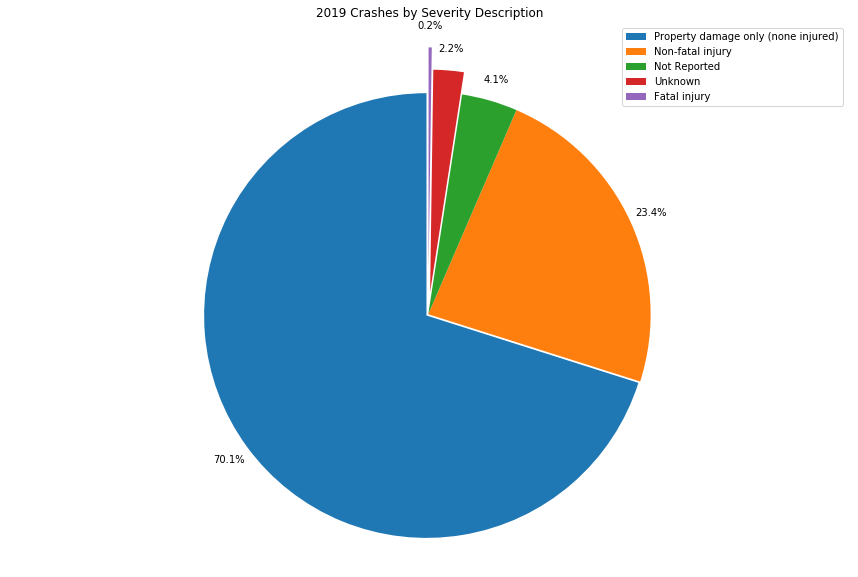

In [73]:
explode_list = (0.01, 0, 0, 0.1, 0.2)
sev_class['NUMB_VEHC'].plot(kind='pie',
                           figsize =(15,10),    # set chart size
                           autopct='%1.1f%%',   # add in percentages
                           startangle=90,       # start angles position
                           labels = None,       # turn off labels on chart
                           pctdistance=1.10,    # ratio between center of each pie slice and start of the text 
                           explode=explode_list
                           )
plt.title('2019 Crashes by Severity Description')

plt.axis('equal')
plt.ylabel('')


plt.legend(labels=sev_class.index, loc = 'best')
plt.show

<em>
    Most crashes result in <strong> Property damage</strong> i.e 70.1%, followed by <strong>Non_fatal injury</strong> at 23.7%.  These 2 account for 93.8% of the effects of crashes; the goal is to reduce both<br>
Considering this unless something is done the number of injuries and fatalities may be higher in other years.
</em>

In [34]:
sev_pivot4 = sev_grpsort.pivot_table('NUMB_VEHC', index='CRASH_SEVERITY_DESCR', columns='CNTY_NAME', aggfunc='sum')
sev_pivot4 = sev_pivot4.fillna(0)#fill missing values with 0
sev_pivot4

CNTY_NAME,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER
CRASH_SEVERITY_DESCR,,,,,,,,,,,,,,
Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45
Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078"
Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785
Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195"
Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565


In [37]:
sev_pivot4

CNTY_NAME,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER
CRASH_SEVERITY_DESCR,,,,,,,,,,,,,,
Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45
Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078"
Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785
Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195"
Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565


In [38]:
#convert a pandas pivot table to a regular dataframe 

new_df = pd.DataFrame(sev_pivot4.to_records())
new_df

,CRASH_SEVERITY_DESCR,BARNSTABLE,BERKSHIRE,BRISTOL,DUKES,ESSEX,FRANKLIN,HAMPDEN,HAMPSHIRE,MIDDLESEX,NANTUCKET,NORFOLK,PLYMOUTH,SUFFOLK,WORCESTER
0,Fatal injury,7,12,46,0,34,5,38,6,40,0,31,32,21,45
1,Non-fatal injury,"1,290",546,"3,890",56,"3,579",263,"3,689",599,"6,417",22,"3,448","3,064","1,623","4,078"
2,Not Reported,117,76,699,10,653,51,625,87,"1,481",51,417,260,327,785
3,Property damage only (none injured),"3,731","1,980","10,335",117,"11,810",923,"8,967","2,103","22,198",133,"9,940","6,998","4,092","14,195"
4,Unknown,62,44,323,1,318,14,262,59,882,16,237,160,124,565


In [39]:
dfz = pd.melt(new_df, id_vars ='CRASH_SEVERITY_DESCR', var_name = 'CNTY_NAME')#, value_name = '' 
dfz.head(10)

,CRASH_SEVERITY_DESCR,CNTY_NAME,value
0,Fatal injury,BARNSTABLE,7
1,Non-fatal injury,BARNSTABLE,"1,290"
2,Not Reported,BARNSTABLE,117
3,Property damage only (none injured),BARNSTABLE,"3,731"
4,Unknown,BARNSTABLE,62
5,Fatal injury,BERKSHIRE,12
6,Non-fatal injury,BERKSHIRE,546
7,Not Reported,BERKSHIRE,76
8,Property damage only (none injured),BERKSHIRE,"1,980"
9,Unknown,BERKSHIRE,44


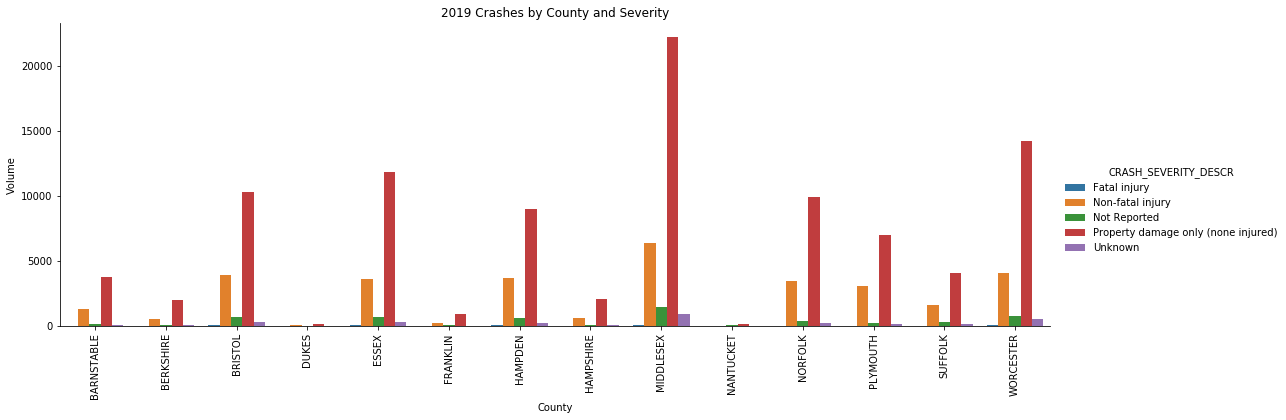

In [40]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(40,80)})

bchart = sns.catplot(x='CNTY_NAME', y='value', hue='CRASH_SEVERITY_DESCR', data=dfz, kind='bar', height=5, aspect=3)
bchart.set(xlabel = "County", ylabel = "Crash Volume")
    
plt.xticks(rotation='vertical') # x axis orientation
plt.title('2019 Crashes by County and Severity')

#bchart.set_size_inches( 16, 10)

bchart

### Recommendations
Department should focus on reducing  "Property Damage" incidences and all "Injuries" starting in Middlesex County since this county has the most volume of these.  

Counties with fewer accidents per area should share with Middlesex some recommendations of having their numbers so low. Changes implemented in these counties can then be rolled out to others.

Department should ensure all crashes reported have severity specified so that the 'Not Reported" number can be bucketized appropriately

In [41]:
#check the conditions of the fatalities
#fatalities.head()

In [42]:
#shows lighting statistics
light = df1[['NUMB_VEHC','AMBNT_LIGHT_DESCR']]
light_class = light.groupby(['AMBNT_LIGHT_DESCR'], as_index =True).count()
light_class = light_class.sort_values(by='NUMB_VEHC', ascending = False)
light_class

,NUMB_VEHC
AMBNT_LIGHT_DESCR,
Daylight,94680
Dark - lighted roadway,28429
Dark - roadway not lighted,7661
Dusk,3691
Dawn,2373
Unknown,1027
Dark - unknown roadway lighting,900
Other,183
Not reported,165


<function matplotlib.pyplot.show(*args, **kw)>

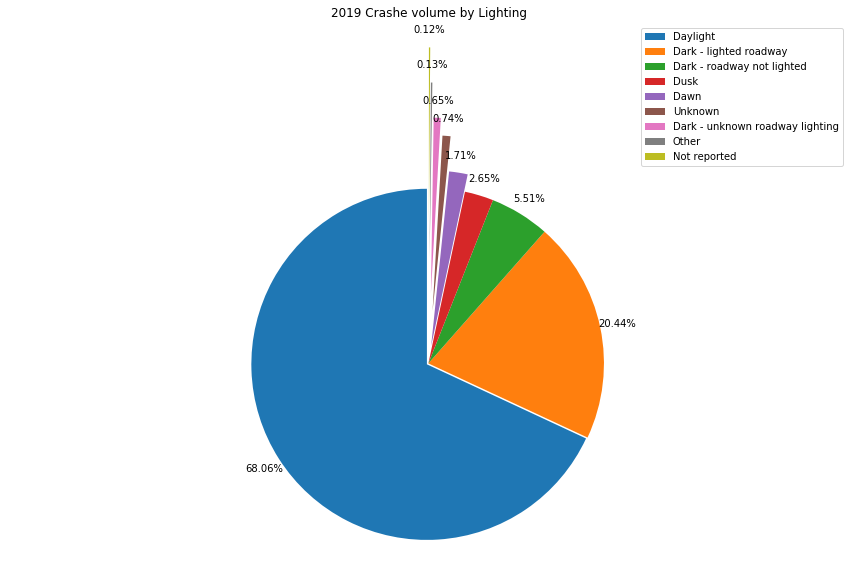

In [71]:
explode_list = (0.01, 0, 0, 0, 0.1, 0.3, 0.4, 0.6, 0.8)
light_class['NUMB_VEHC'].plot(kind='pie',
                           figsize =(15,10),    # set chart size
                           autopct='%1.2f%%',   # add in percentages
                           startangle=90,       # start angles position
                           labels = None,       # turn off labels on chart
                           pctdistance=1.10,    # ratio between center of each pie slice and start of the text 
                           explode=explode_list
                           )
plt.title('2019 Crashe volume by Lighting')

plt.axis('equal')
plt.ylabel('')
plt.legend(labels=light_class.index, loc = 'best')

plt.show

Are the 11.5% crashes that happen when it is not daylight happen in areas where lighting needs to be improved upon?

Department should ensure all crashes reported have clear lighting conditions specified so that the "Not Reported", "Unknown" and "Other" number can be bucketized appropriately

In [44]:
df2_fatalities = fatalities[['CNTY_NAME', 'CITY_TOWN_NAME','NUMB_FATAL_INJR']].groupby(['CITY_TOWN_NAME'])['NUMB_FATAL_INJR'].count().reset_index(name='FATAL_VOL').sort_values(['FATAL_VOL'], ascending=False)
df2_fatalities.head()

,CITY_TOWN_NAME,FATAL_VOL
14,BOSTON,19
128,SPRINGFIELD,9
135,TAUNTON,8
156,WORCESTER,8
25,CHICOPEE,7
